In [1]:
import pandas as pd

# Import by comment

In [242]:
data = pd.read_csv('/Users/gavin/Documents/Metis/Coursework/Project_4/dataframes/per_comment.csv').drop('Unnamed: 0', axis=1)

# Preprocess

In [243]:
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['text'] = data.text.apply(str).map(alphanumeric).map(punc_lower)
data.head()

,url,url_time,date,speaker,time,text,datetime,week
0,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/0...,"Oct 26, 2020",Andrew Cuomo,00:02,people who are with me on the dais my far lef...,2020-10-26,44
1,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/0...,"Oct 26, 2020",Andrew Cuomo,01:03,okay today is day but i had a revelation o...,2020-10-26,44
2,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/0...,"Oct 26, 2020",Andrew Cuomo,02:31,we’re not going to control the pandemic all w...,2020-10-26,44
3,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/0...,"Oct 26, 2020",Andrew Cuomo,03:53,they’re watching what happened in china and it...,2020-10-26,44
4,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/0...,"Oct 26, 2020",Andrew Cuomo,05:07,it was never let’s keep the economy open vers...,2020-10-26,44


In [804]:
topic_df

,index,url,url_time,date,speaker,time,text,datetime,week,topic,lemma,pos,noun,adj,noun_adj
0,63,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/0...,"Oct 26, 2020",Jesse,36:30,okay can i say just very quickly typically o...,2020-10-26,44,3,"[okay, , can, i, say, just, very, quickly, ,...","[INTJ, SPACE, VERB, PRON, VERB, ADV, ADV, ADV,...","[tuesday, announcement, quarantine, thing, rol...",[],"[tuesday, announcement, quarantine, thing, rol..."
1,73,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/0...,"Oct 26, 2020",Speaker 3,38:25,right but if you saw a major issue in june,2020-10-26,44,3,"[right, , but, if, -PRON-, see, a, major, iss...","[INTJ, SPACE, CCONJ, SCONJ, PRON, VERB, DET, A...",[issue],[major],"[issue, major]"
2,130,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/H...,"Oct 21, 2020",Andrew Cuomo,38:10,no i am sorry that they feel the disruption ...,2020-10-21,43,3,"[no, , i, be, sorry, that, -PRON-, feel, the,...","[INTJ, SPACE, PRON, AUX, ADJ, SCONJ, PRON, VER...","[disruption, ceremony, people, synagogue, peop...","[sorry, sorry, religious, many, many, sorry, s...","[disruption, ceremony, people, synagogue, peop..."
3,132,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/H...,"Oct 21, 2020",Andrew Cuomo,41:19,and the response is what the response was in t...,2020-10-21,43,3,"[and, the, response, be, what, the, response, ...","[CCONJ, DET, NOUN, AUX, PRON, DET, NOUN, AUX, ...","[response, response, place, turning, dial, rec...","[first, right, inaudible, second, inaudible]","[response, response, place, turning, dial, rec..."
4,153,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/H...,"Oct 21, 2020",Andrew Cuomo,53:12,i can’t see you speaking because of the masks ...,2020-10-21,43,3,"[i, can, not, see, -PRON-, speak, because, of,...","[PRON, VERB, PART, VERB, PRON, VERB, SCONJ, AD...",[mask],[],[mask]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,10400,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/a...,"Mar 10, 2020",Speaker 1,19:51,crosstalk sorry excuse me and we’re...,2020-03-10,11,3,"[ , crosstalk, , sorry, , excuse, -PR...","[SPACE, PROPN, SPACE, ADJ, SPACE, VERB, PRON, ...","[mayor, county, executive, list, governor, con...","[sorry, major]","[mayor, county, executive, list, governor, con..."
728,10405,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/a...,"Mar 10, 2020",Speaker 4,20:10,there’s no travel restrictions of any kind,2020-03-10,11,3,"[there, ’, no, travel, restriction, of, any, k...","[PRON, VERB, DET, NOUN, NOUN, ADP, DET, NOUN]","[travel, restriction, kind]",[],"[travel, restriction, kind]"
729,10411,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/a...,"Mar 10, 2020",Melissa DeRosa,20:37,there’s a boys and girls club that was on the ...,2020-03-10,11,3,"[there, ’, a, boy, and, girl, club, that, be, ...","[PRON, VERB, DET, NOUN, CCONJ, NOUN, NOUN, DET...","[boy, girl, club, list, thing]",[],"[boy, girl, club, list, thing]"
730,10442,https://www.rev.com/blog/transcripts/new-york-...,https://www.rev.com/transcript-editor/shared/a...,"Mar 10, 2020",Governor Andrew Cuomo,23:27,i’m sorry,2020-03-10,11,3,"[-PRON-, be, sorry]","[PRON, VERB, ADJ]",[],[sorry],[sorry]


In [924]:
topic = 3
topic_df = data[data['topic']==topic].copy().reset_index()
count=0
for row in topic_df:
    print('topic: ', topic_df.topic.iloc[count], 'date: ', topic_df.datetime.iloc[count], '\n', date_df.text.iloc[count],'\n')
    count+=1

IndexError: single positional indexer is out-of-bounds

In [814]:
date = '2020-06-01'
date_df = data[data['datetime']==date]
count=0
for row in date_df:
    print('topic: ', date_df.topic.iloc[count], '\n',date_df.text.iloc[count], '\n')
    count+=1

topic:  0 
 another long night in this country  to my left  i’m glad to be joined by dr  howard zucker  to my right  i’m glad to be joined by secretary melissa derosa  let’s talk about where we are  start with the facts that we know  in terms of handling the covid virus  we’re doing better than we’ve ever done before  the number of hospitalizations is down  it’s continued to drop  the reduction in the number of intubations is down  the three day average of new hospitalizations is down to the lowest level ever  which is really good news  we’re doing a significant amount of testing  as you know  we’re testing more than any state in the united states  with testing more per capita than any country on the globe  and the tests are very relevant because they’re a snapshot in time  they tell you where you are on that day  yesterday  we did about     tests  which is a tremendous number of tests  less than     people tested positive  

topic:  0 
 that is the lowest number we have had since this

# Continued Preprocessing: SpaCy

In [280]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [281]:
lemma_list = []
for comment in data['text'].apply(str):
    lemma = []
    nlp_comment = nlp(comment)
    for word in nlp_comment:
        lemma.append(word.lemma_)
    lemma_list.append(lemma)
data['lemma'] = lemma_list

In [282]:
pos_list = []
for comment in data['text'].apply(str):
    pos = []
    nlp_comment = nlp(comment)
    for word in nlp_comment:
        pos.append(word.pos_)
    pos_list.append(pos)
data['pos'] = pos_list

In [283]:
noun_list = []
for i in range(len(data.lemma)):
    comment = list(zip(data.lemma[i], data.pos[i]))
    nouns = []
    for row in comment:
        if row[1]=='NOUN':
            nouns.append(row[0])
    noun_list.append(nouns)
data['noun'] = noun_list


In [284]:
adj_list = []
for i in range(len(data.lemma)):
    comment = list(zip(data.lemma[i], data.pos[i]))
    adj = []
    for row in comment:
        if row[1]=='ADJ':
            adj.append(row[0])
    adj_list.append(adj)
data['adj'] = adj_list

In [285]:
data['noun_adj'] = data['noun']+data['adj']

# List of Stop Words

In [897]:
from sklearn.feature_extraction import text
my_stop_words = my_stop_words = text.ENGLISH_STOP_WORDS.union(['good','different','hasn', 'covid','inaudible', 'way','today', 'mr', 'person', 'help', 'virus', 'going', 'like', 'people', 'said', 'know', 'doing', 'say', 'day', 'think', 'did', 'look', 'let', 'right', 've', 'i', 'll', 'new', 'city', 'york', 'state', 'm', 'don', 'come', 'time' 'inaudible','didn','yes','yeah','thing','sir','guys','crosstalk','hey' 'doesn','t','got','okay','hello', 'great', 'says', 'just', 'want','somebody', 'does','thank',  'week', 'make'])

# LDA

In [898]:
# sklearn
from sklearn import datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# logging (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [899]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = my_stop_words,
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                ngram_range = (1,1),
                                max_df = 0.1, 
                                min_df = 1)
dtm_tf = tf_vectorizer.fit_transform(data.noun_adj.apply(str))
print(dtm_tf.shape)

(10474, 6152)


In [900]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(data.noun_adj.apply(str))
print(dtm_tfidf.shape)

(10474, 6152)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [901]:
import pickle
outfile = open('tf_idf_vectorizer.pkl', 'wb')
pickle.dump(tfidf_vectorizer, outfile)
outfile.close()

In [902]:
outfile = open('dtm_tfidf.pkl', 'wb')
pickle.dump(dtm_tfidf, outfile)
outfile.close()

In [903]:
lda_tfidf = LatentDirichletAllocation(n_components=8 , random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=8, random_state=0)

In [904]:
outfile = open('lda_tfidf.pkl', 'wb')
pickle.dump(lda_tfidf, outfile)
outfile.close()

In [905]:
outcome = lda_tfidf.transform(dtm_tfidf)
topics = ['Stats Driven Predictions & Planning', 'Politicized COVID Issues', 'Political Banter', 'Reopening', 'Essential Services', 'State Mandates', 'Enforcement & Opposition', 'Election Related COVID Commentary']
topic_scores = pd.DataFrame(outcome, columns = topics)

In [906]:
topic_scores.head()

,Stats Driven Predictions & Planning,Politicized COVID Issues,Political Banter,Reopening,Essential Services,State Mandates,Enforcement & Opposition,Election Related COVID Commentary
0,0.021265,0.021269,0.021262,0.090012,0.273550,0.021247,0.530104,0.021292
1,0.024221,0.408922,0.024092,0.024088,0.024134,0.024073,0.024140,0.446331
2,0.025507,0.276135,0.570738,0.025472,0.025483,0.025476,0.025473,0.025716
3,0.037838,0.735280,0.037813,0.037803,0.037808,0.037828,0.037826,0.037804
4,0.024044,0.785800,0.024207,0.024031,0.024027,0.069823,0.024045,0.024023


In [907]:
topic_scores['topic'] = topic_scores.idxmax(axis=1)

In [908]:
data['topic'] = topic_scores['topic']

In [909]:
topic_matrix = topic_scores['topic'].reset_index().drop('index', axis=1)

In [910]:
for topic in topics:
    topic_matrix[topic]=0
for topic in topics:
    topic_matrix.loc[topic_matrix['topic']==topic, topic]=1

In [911]:
topic_matrix['date'] = pd.to_datetime(data['datetime'])

In [912]:
# topic_matrix.drop('topic', axis = 1, inplace=True)

In [913]:
topic_matrix

,topic,Stats Driven Predictions & Planning,Politicized COVID Issues,Political Banter,Reopening,Essential Services,State Mandates,Enforcement & Opposition,Election Related COVID Commentary,date
0,Enforcement & Opposition,0,0,0,0,0,0,1,0,2020-10-26
1,Election Related COVID Commentary,0,0,0,0,0,0,0,1,2020-10-26
2,Political Banter,0,0,1,0,0,0,0,0,2020-10-26
3,Politicized COVID Issues,0,1,0,0,0,0,0,0,2020-10-26
4,Politicized COVID Issues,0,1,0,0,0,0,0,0,2020-10-26
...,...,...,...,...,...,...,...,...,...,...
10469,Stats Driven Predictions & Planning,1,0,0,0,0,0,0,0,2020-03-10
10470,Stats Driven Predictions & Planning,1,0,0,0,0,0,0,0,2020-03-10
10471,Enforcement & Opposition,0,0,0,0,0,0,1,0,2020-03-10
10472,Essential Services,0,0,0,0,1,0,0,0,2020-03-10


In [914]:
topic_matrix_date = topic_matrix.groupby('date', axis=0).sum()

In [915]:
topic_matrix_date.head(73)

,Stats Driven Predictions & Planning,Politicized COVID Issues,Political Banter,Reopening,Essential Services,State Mandates,Enforcement & Opposition,Election Related COVID Commentary
date,,,,,,,,
2020-03-10,42,7,8,7,21,10,7,6
2020-03-16,55,19,3,32,20,3,31,10
2020-03-17,29,20,8,6,10,1,11,4
2020-03-18,31,4,6,5,16,5,9,4
2020-03-19,24,14,7,6,14,3,18,3
...,...,...,...,...,...,...,...,...
2020-05-28,25,12,16,12,24,6,15,5
2020-05-29,22,3,5,5,19,2,7,3
2020-05-31,4,4,1,2,5,1,39,1


In [917]:
topic_matrix_date.to_csv('/Users/gavin/Documents/Metis/Coursework/Project_4/dataframes/seven_topic_matrix.csv')

In [920]:
display_topics(lda_tfidf, tfidf_vectorizer.get_feature_names(), 15)


Topic  0
question, school, test, rate, testing, infection, case, positive, plan, hospitalization, antibody, datum, fact, high, news

Topic  1
ventilator, federal, government, hospital, projection, model, bed, president, stockpile, supply, vaccine, governor, mask, month, equipment

Topic  2
line, guy, smart, doctor, tough, question, open, government, life, family, mask, store, job, economy, old

Topic  3
sorry, budget, mask, money, operator, federal, unemployment, quarantine, question, year, mayor, gym, indoor, governor, beach

Topic  4
governor, hospital, worker, essential, business, train, public, work, subway, service, phase, region, death, healthcare, homeless

Topic  5
home, nursing, facility, patient, second, resident, rule, answer, care, staff, park, governor, wave, regulation, sense

Topic  6
police, law, local, government, fact, point, enforcement, change, situation, community, issue, compliance, moment, department, decision

Topic  7
election, capacity, bed, contact, test, to

In [921]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)

import seaborn as sns
import matplotlib.patheffects as PathEffects
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# Random state.
RS = 20200807


In [ ]:
tsne = TSNE(n_components = 8)

# LSA

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

lsa_tfidf_vectorizer = TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = my_stop_words,
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                ngram_range = (1,1),
                                max_df = 0.8, 
                                min_df = 10)
doc_word = lsa_tfidf_vectorizer.fit_transform(data.noun_adj.apply(str))
print(doc_word.shape)

(10474, 1594)


In [91]:
dtm_lsa = pd.DataFrame(doc_word.toarray(), columns=lsa_tfidf_vectorizer.get_feature_names())

In [92]:
dtm_lsa.head()

,ability,able,absentee,absurd,abuse,academic,access,accomplishment,accountable,accurate,...,wrong,year,yellow,yesterday,yorker,young,zach,zip,zone,zucker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.380170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.128093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(30)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_.sum()

0.19488008996156367

In [121]:
x = []
y = []
for i in range(100):
    lsa = TruncatedSVD(i)
    doc_topic = lsa.fit_transform(doc_word)
    variance = lsa.explained_variance_ratio_.sum()
    points.append([i, variance])
    x.append(i)
    y.append(variance)

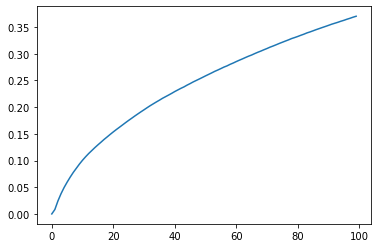

In [122]:
import matplotlib.pyplot as plt
plt.plot(x, y);

In [124]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             columns = lsa_tfidf_vectorizer.get_feature_names())
topic_word

,ability,able,absentee,absurd,abuse,academic,access,accomplishment,accountable,accurate,...,wrong,year,yellow,yesterday,yorker,young,zach,zip,zone,zucker
0,0.008,0.030,0.003,0.003,0.004,0.002,0.003,0.003,0.003,0.008,...,0.020,0.049,0.003,0.067,0.029,0.014,0.002,0.013,0.007,0.003
1,-0.004,-0.010,-0.000,-0.000,-0.001,-0.001,-0.002,-0.000,-0.001,-0.004,...,-0.007,-0.014,-0.002,-0.032,-0.012,-0.005,-0.001,-0.006,-0.004,0.001
2,-0.001,0.003,0.002,-0.000,0.000,0.001,0.000,-0.001,-0.000,-0.004,...,-0.004,0.005,-0.001,0.001,-0.007,-0.002,-0.001,-0.006,-0.002,-0.000
3,-0.002,0.005,-0.001,0.000,-0.003,-0.002,-0.001,-0.002,-0.000,-0.001,...,-0.005,-0.038,-0.002,-0.015,-0.012,-0.008,-0.000,-0.009,-0.005,0.001
4,-0.007,-0.019,-0.002,0.000,-0.006,-0.003,-0.002,0.000,-0.004,0.008,...,-0.014,-0.064,-0.001,0.031,-0.006,-0.014,-0.001,-0.001,-0.000,0.000
5,0.005,0.003,-0.001,-0.001,0.000,-0.002,0.001,-0.000,0.002,-0.004,...,-0.004,-0.011,-0.002,-0.005,-0.003,-0.006,-0.000,-0.014,-0.006,0.001
6,-0.002,0.011,0.001,-0.002,-0.004,0.004,-0.001,-0.001,-0.001,-0.003,...,-0.007,-0.022,0.001,-0.015,-0.017,-0.002,0.000,0.012,0.007,0.000
7,0.003,0.012,-0.001,-0.002,-0.002,-0.002,-0.001,-0.000,-0.000,0.001,...,-0.011,-0.009,0.001,0.009,-0.019,-0.010,-0.002,-0.002,-0.002,-0.001
8,0.002,0.026,-0.000,-0.001,0.001,-0.001,0.003,0.001,-0.002,-0.003,...,-0.002,-0.039,0.001,-0.007,0.015,0.007,0.001,0.007,0.003,-0.001
9,0.002,0.009,0.001,-0.001,-0.004,-0.000,-0.001,-0.001,-0.001,0.001,...,-0.002,-0.037,-0.001,0.012,-0.003,-0.007,0.000,-0.005,-0.003,0.000


In [128]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [132]:
display_topics(lsa, lsa_tfidf_vectorizer.get_feature_names(), 15)


Topic  0
question, number, governor, hospital, home, government, nursing, rate, test, school, time, case, testing, federal, infection

Topic  1
question, line, operator, open, audience, answer, tough, follow, sorry, telephone, star, comment, keypad, roster, quick

Topic  2
governor, morning, government, president, federal, mayor, budget, school, unemployment, order, secretary, mta, power, plan, left

Topic  3
home, nursing, patient, facility, death, staff, resident, hospital, care, vulnerable, test, governor, question, asymptomatic, visitor

Topic  4
number, governor, hospital, rate, hospitalization, case, death, news, infection, bed, question, low, ventilator, icu, high

Topic  5
hospital, ventilator, bed, capacity, government, federal, patient, stockpile, equipment, supply, public, healthcare, mask, facility, ppe

Topic  6
school, hospital, plan, district, test, capacity, parent, child, testing, bed, student, teacher, private, datum, kid

Topic  7
test, testing, government, federal,

# NMF

In [137]:
from sklearn.decomposition import NMF

In [816]:
nmf_model = NMF(8)
doc_topic = nmf_model.fit_transform(doc_word)

In [817]:
topic_word_nmf = pd.DataFrame(nmf_model.components_.round(3),
             columns = lsa_tfidf_vectorizer.get_feature_names())
topic_word_nmf

,ability,able,absentee,absurd,abuse,academic,access,accomplishment,accountable,accurate,...,wrong,year,yellow,yesterday,yorker,young,zach,zip,zone,zucker
0,0.000,0.000,0.001,0.011,0.000,0.001,0.004,0.014,0.000,0.067,...,0.054,0.041,0.009,0.333,0.118,0.028,0.006,0.071,0.037,0.005
1,0.000,0.009,0.002,0.003,0.000,0.000,0.000,0.004,0.000,0.002,...,0.003,0.009,0.000,0.004,0.005,0.001,0.001,0.000,0.000,0.008
2,0.000,0.025,0.006,0.001,0.000,0.003,0.003,0.000,0.000,0.002,...,0.000,0.005,0.000,0.091,0.003,0.000,0.000,0.000,0.003,0.002
3,0.002,0.039,0.000,0.004,0.000,0.000,0.000,0.000,0.004,0.003,...,0.021,0.000,0.000,0.013,0.008,0.004,0.003,0.000,0.000,0.006
4,0.031,0.060,0.006,0.005,0.027,0.004,0.011,0.007,0.014,0.000,...,0.069,0.265,0.005,0.067,0.090,0.058,0.005,0.005,0.004,0.002
5,0.018,0.039,0.001,0.000,0.000,0.000,0.004,0.000,0.005,0.001,...,0.001,0.000,0.000,0.058,0.007,0.000,0.002,0.000,0.000,0.005
6,0.004,0.036,0.006,0.000,0.000,0.020,0.001,0.000,0.004,0.000,...,0.028,0.097,0.007,0.002,0.000,0.023,0.003,0.049,0.028,0.002
7,0.014,0.087,0.001,0.000,0.000,0.000,0.004,0.003,0.000,0.008,...,0.000,0.000,0.006,0.064,0.009,0.006,0.002,0.021,0.009,0.000


In [818]:
display_topics(nmf_model, lsa_tfidf_vectorizer.get_feature_names(), 15)


Topic  0
number, rate, case, infection, hospitalization, death, news, high, low, fact, curve, total, yesterday, region, time

Topic  1
question, line, operator, open, answer, tough, audience, smart, second, sorry, sure, follow, telephone, comment, moment

Topic  2
governor, morning, yesterday, president, mayor, secretary, point, order, unemployment, time, left, phase, lot, mta, director

Topic  3
home, nursing, patient, facility, death, staff, resident, care, vulnerable, worker, policy, issue, information, family, case

Topic  4
government, federal, mask, local, time, police, law, business, situation, job, budget, year, worker, fact, health

Topic  5
hospital, ventilator, bed, capacity, patient, public, facility, icu, equipment, health, stockpile, healthcare, private, staff, ppe

Topic  6
school, plan, district, parent, child, decision, teacher, student, business, datum, kid, safe, fact, college, public

Topic  7
test, testing, antibody, positive, lab, capacity, region, diagnostic, si